## Task 01

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Representa el coeficiente de regresión sin estandarizar, el cual se calcula siguiendo el método de los mínimos cuadrados ordinarios y hay uno de dichos coeficientes para cada variable independiente.
Es el cambio estimado en unidades de "y" que se deriva del incremento de X₂ (variable independiente) cuando X₁ se mantiene constante.

https://physiostats.com/regresion-lineal-interpretacion-coeficientes/

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en la regresión lineal ocurre cuando las variables que se usan para predecir están muy conectadas. Esto causa resultados extraños en las interpretaciones y reduce la precisión de los coeficientes. También dificulta la identificación de variables importantes y puede conducir a problemas numéricos. (Sevilla, A. 2019)

https://economipedia.com/definiciones/multicolinealidad.html

## Task 02

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos desde el archivo CSV
file_path = 'dataset_phishing.csv'
df = pd.read_csv(file_path)

X = df[['length_url', 'nb_dots', 'nb_at', 'domain_age']]
y = df.iloc[:, -1]

print(X.head())
print(y.head())

# 1, 9, 10

   length_url  nb_dots  nb_at  domain_age
0          37        3      0          -1
1          77        1      0        5767
2         126        4      0        4004
3          18        2      0          -1
4          55        2      0        8175
0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object


In [3]:
# Codificar la variable de salida
dummies = pd.get_dummies(y)
concatenado = pd.concat([y, dummies], axis=1)
concatenado = concatenado.drop(['status', "legitimate"], axis=1)
y = concatenado


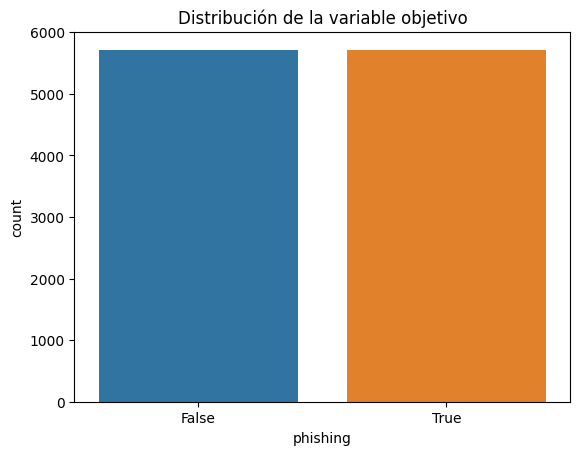

(11430, 4)
(11430, 1)


In [4]:
# Revisar si el dataset está balanceado
sns.countplot(x='phishing', data=y)
plt.title('Distribución de la variable objetivo')
plt.show()

print(X.shape)
print(y.shape)


In [5]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


- Cambiamos el formato de los datos en y

In [6]:
y
y = y[:, -1]
y

array([False,  True,  True, ..., False, False,  True])

In [7]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1) # cambiamos a distribución 80/20
#X_entreno, X_temp, y_entreno, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Normalizando los datos

In [8]:
"""from sklearn.preprocessing import StandardScaler
standar_x = StandardScaler()
X_entreno = standar_x.fit_transform(X_entreno)
X_prueba = standar_x.transform(X_prueba)
X_entreno
X_prueba"""

'from sklearn.preprocessing import StandardScaler\nstandar_x = StandardScaler()\nX_entreno = standar_x.fit_transform(X_entreno)\nX_prueba = standar_x.transform(X_prueba)\nX_entreno\nX_prueba'

- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de
desempeño principal

### Regresion Logistica - implementacion

In [9]:
gradiente = pd.DataFrame()
# 'length_url', 'nb_dots', 'nb_at', 'domain_age'
gradiente["datosX"] = pd.DataFrame(X_entreno[:, 0])
gradiente["datosY"] = pd.DataFrame(y_entreno.astype(int))
gradiente["sigmoide"] = 0
gradiente["error"] = 0 
print(gradiente)

      datosX  datosY  sigmoide  error
0        127       1         0      0
1         51       1         0      0
2        122       0         0      0
3         32       0         0      0
4         30       1         0      0
...      ...     ...       ...    ...
9139      41       0         0      0
9140      17       0         0      0
9141      40       1         0      0
9142      43       0         0      0
9143      60       0         0      0

[9144 rows x 4 columns]


In [10]:
def gradiente_w(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX"]*w+b)))
    gradiente["error"] = (gradiente["sigmoide"]-gradiente["datosY"])*gradiente["datosX"]
    derivative = gradiente["error"].mean()
    return(derivative) 

def gradiente_b(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX"]*w+b)))
    gradiente["error"] = (gradiente["sigmoide"]-gradiente["datosY"])
    derivative = gradiente["error"].mean()
    return(derivative) 


In [11]:
pasos_w = 0.01
pasos_b = 0.01
w = 0
b = 0

for i in range(1000):
    w = w - pasos_w*gradiente_w(w, b)
    b = b - pasos_b*gradiente_b(w, b)

print(w)
print(b)

0.25063526509426715
-0.9900323301230768


9144


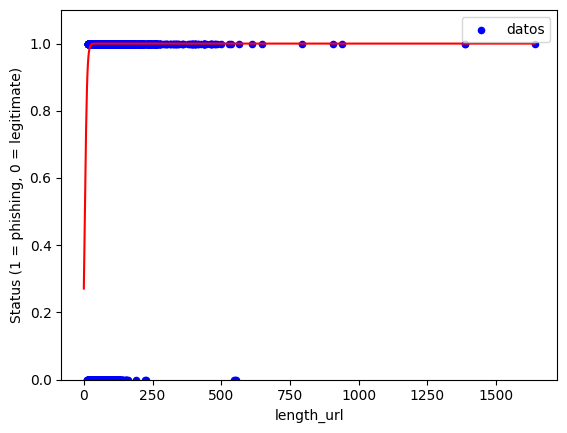

In [12]:
x = np.linspace(0, gradiente["datosX"].max(), 1000) # datos x es el conjunto de datos de entrenamiento
y = 1/(1+np.exp(-(x*w+b)))

print(len(gradiente["datosX"]))

gradiente.plot.scatter(x="datosX",y="datosY", label="datos", color="blue")
plt.plot(x, y, '-r')
plt.ylim(0,gradiente["datosY"].max()*1.1)

plt.xlabel('length_url')
plt.ylabel('Status (1 = phishing, 0 = legitimate)')

plt.show()

### Regresión Logística - Librerias

In [13]:
# Importar Librerías Generales
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
# Leer el archivo CSV
df = pd.read_csv('dataset_phishing.csv')

# Es conveniente usar encoding para evitar problemas con los caracteres especiales (Legitimate y Phishing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


Es importante elegir los datos de entrenamiento con cuidado. Se generaron gráficas de dispersión, que muestran la relación de cierta variable con status (Y). Se usaron las columnas que presentaban una diferencia en la distribución entre Legitimate y Phishing. 

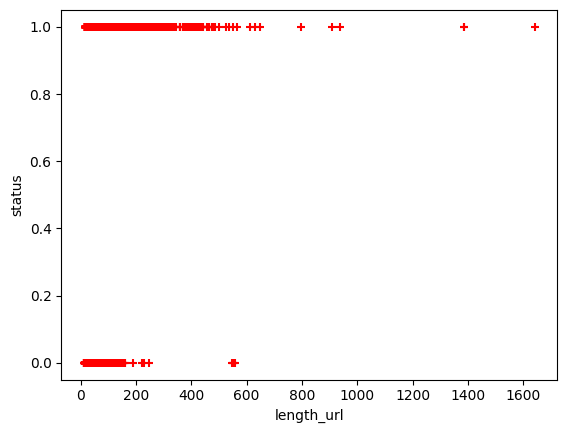

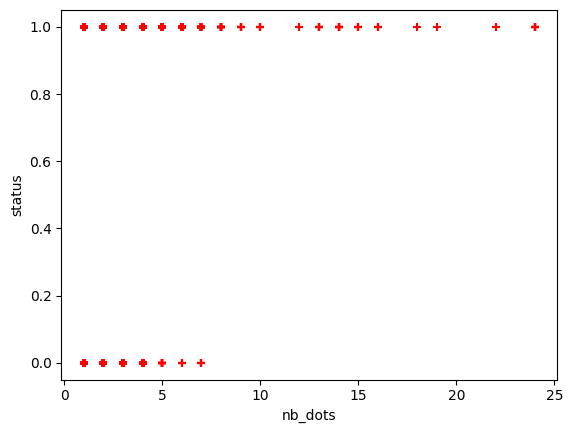

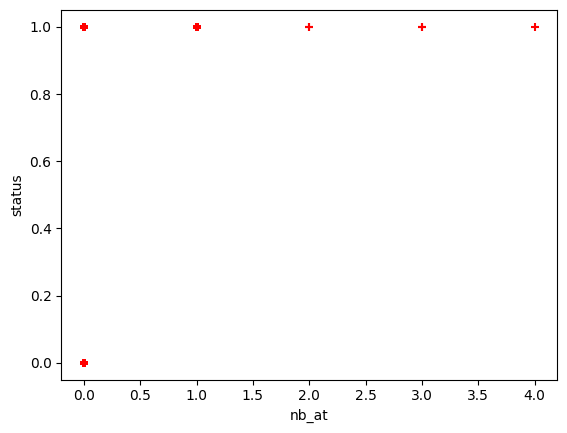

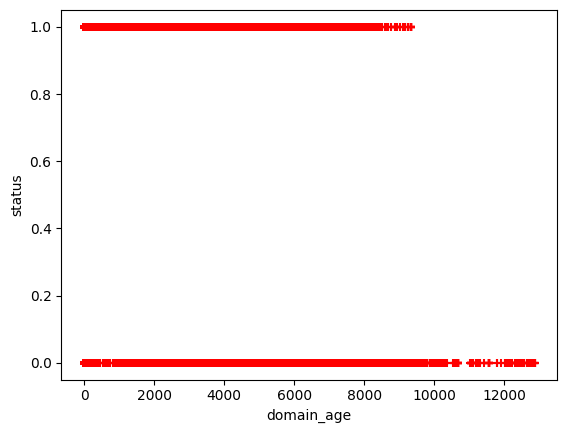

In [15]:
possible_columns = ['length_url', 'nb_dots', 'nb_at', 'domain_age']
for i in possible_columns:
    plt.scatter(df[i], df['status'], marker='+', color='red')
    plt.xlabel(i)
    plt.ylabel('status')
    plt.show()
# Conclusión, usaremos length_url, nb_dots, nb_at y domain_age para entrenar el modelo. 

In [16]:
# Dividir el conjunto de datos en variables independientes y dependientes
from sklearn.model_selection import train_test_split
X = df[['length_url', 'nb_dots', 'nb_at', 'domain_age']] # variables independientes possible_columns
y = df['status'] # variable dependiente

In [17]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% entrenamiento, 20% prueba

In [18]:
# Comprobación: 
print(type(X))
print(type(y), '\n')

print(y.value_counts(), '\n\n', "Distribución de la variable objetivo")
print(X_train.shape)
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> 

status
0    5715
1    5715
Name: count, dtype: int64 

 Distribución de la variable objetivo
(9144, 4)
(2286, 4)


In [19]:
# escalado de variables. 
# Se hace para que las variables tengan la misma importancia en el modelo

from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()

X_train_escaled = StandardScaler.fit_transform(X_train)
X_test_escaled = StandardScaler.transform(X_test)

print(X_train_escaled, '\n')
print(X_test_escaled)


# Compara los primeros 5 datos de X_train y X_train_escaled
print(X_train.head(), '\n')
print(X_train_escaled[0:5])

# Compara los primeros 5 datos de X_test y X_test_escaled
print(X_test.head(), '\n')
print(X_test_escaled[0:5])

[[-0.58209766 -0.36163344 -0.14335914  1.25527695]
 [ 0.18149079 -0.36163344 -0.14335914 -1.05816028]
 [-0.79746876 -0.36163344 -0.14335914  1.121314  ]
 ...
 [ 0.31854513 -0.36163344 -0.14335914  0.59995335]
 [-0.24925141  0.3788001  -0.14335914 -0.30204243]
 [-0.2688306  -0.36163344 -0.14335914 -1.3090188 ]] 

[[-0.52336008 -0.36163344 -0.14335914  0.69430707]
 [-0.13177626  0.3788001  -0.14335914 -1.3090188 ]
 [-0.6995728  -1.10206698 -0.14335914 -0.73548988]
 ...
 [ 0.04443646 -0.36163344 -0.14335914  1.40759541]
 [-0.34714736  0.3788001  -0.14335914  1.48037337]
 [-0.64083523 -0.36163344 -0.14335914 -0.09111518]]
      length_url  nb_dots  nb_at  domain_age
9912          31        2      0        7962
1002          70        2      0         778
8699          20        2      0        7546
8782          81        3      0        4778
4350          31        2      0        6686 

[[-0.58209766 -0.36163344 -0.14335914  1.25527695]
 [ 0.18149079 -0.36163344 -0.14335914 -1.05816028]


In [20]:
# Ajuste del modelo
from sklearn.linear_model import LogisticRegression
regresion = LogisticRegression(random_state=0) # logistic regression
regresion.fit(X_train_escaled, y_train)

LogisticRegression(random_state=0)

In [21]:
# Predicción del modelo
model = regresion.predict(X_test_escaled)
ans = regresion.score(X_test_escaled, y_test)

print("model score: %.3f" % ans)

# format as table. Use pandas. Highlight when real and predicted are different.
temptable = pd.DataFrame({'Real':y_test, 'Predicción':model})
if len(temptable) > 10:
    print(temptable.head(10))



model score: 0.709
      Real  Predicción
6406     0           0
4266     1           1
1238     1           0
2646     1           1
2217     0           0
2158     1           0
9823     0           0
4401     1           0
9349     0           0
1399     0           0


Arriba se puede observar una pequeña comparación entre las predicciones de nuestro modelo y lo real. 0 representa legitimate y 1 phishing. 

[[830 325]
 [341 790]] 

Accuracy:  70.87 %


Text(50.722222222222214, 0.5, 'Truth')

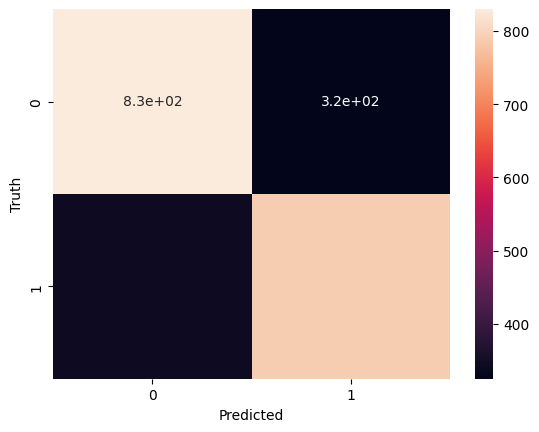

In [22]:
# matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, model)
print(confusion_matrix, '\n')

accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

# convert accuracy to percentage. Use only two decimal places
accuracy = accuracy*100
accuracy = round(accuracy, 2)

print("Accuracy: " , accuracy, "%")

import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
# Reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1155
           1       0.71      0.70      0.70      1131

    accuracy                           0.71      2286
   macro avg       0.71      0.71      0.71      2286
weighted avg       0.71      0.71      0.71      2286



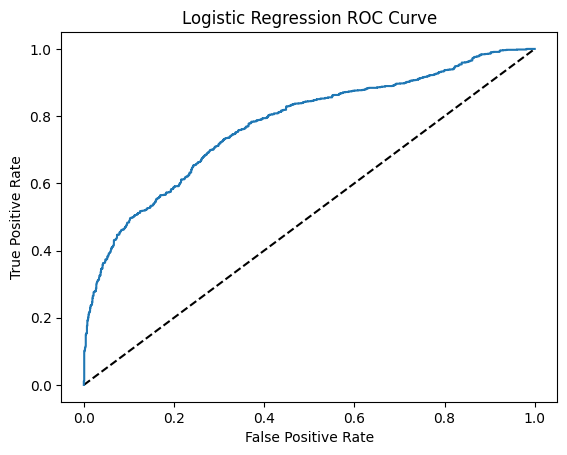

In [24]:
# Curva ROC
from sklearn.metrics import roc_curve

y_pred_prob = regresion.predict_proba(X_test_escaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

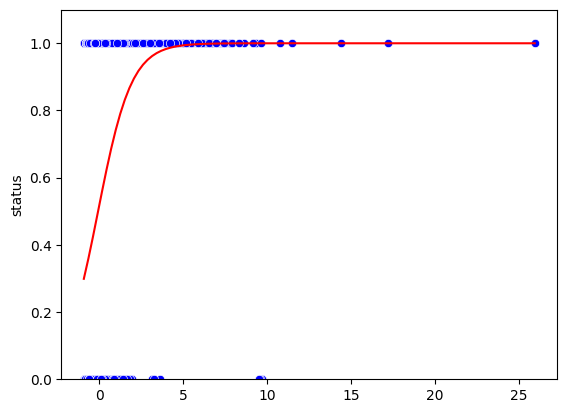

In [25]:
# Ajustamos el modelo de regresión logística
regresion = LogisticRegression()
regresion.fit(X_train_escaled[:, 0].reshape(-1, 1), y_train)

# Generamos un rango de valores de la característica
x_values = np.linspace(X_train_escaled[:, 0].min(), X_train_escaled[:, 0].max(), 100).reshape(-1, 1)

# Predecimos las probabilidades para estos valores
y_values = regresion.predict_proba(x_values)[:, 1]

# Trazamos los datos
sns.scatterplot(x=X_train_escaled[:, 0], y=y_train, color="blue")

# Trazamos la curva de regresión logística
plt.plot(x_values, y_values, '-r')

plt.ylim(0,1.1)  # Ajustamos los límites del eje y para que vayan de 0 a 1.1
plt.show()

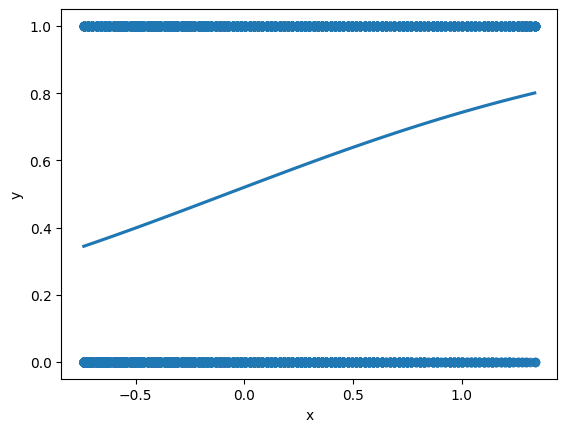

In [26]:
# Asumiendo que X_train_escaled[:, 0] y y_train están en un DataFrame llamado df
df = pd.DataFrame({'x': X_train_escaled[:, 0], 'y': y_train})

# Limitamos el rango de los datos en el eje x
df = df[df['x'].between(df['x'].quantile(.05), df['x'].quantile(.95))]

sns.regplot(x='x', y='y', data=df, logistic=True, ci=None)

plt.ylim(-0.05, 1.05)  # Ajustamos los límites del eje y para que vayan de -0.05 a 1.05
plt.show()

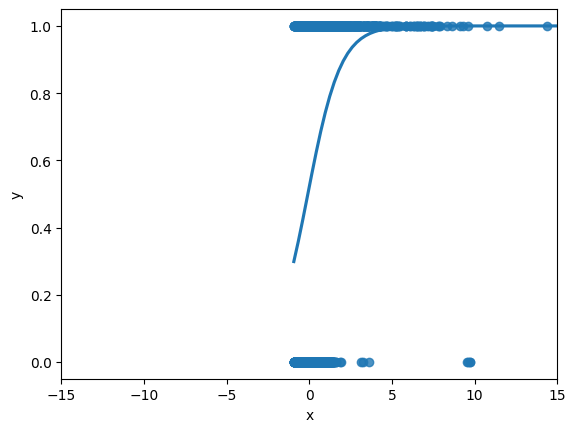

In [27]:
# Asumiendo que X_train_escaled[:, 0] y y_train están en un DataFrame llamado df
df = pd.DataFrame({'x': X_train_escaled[:, 0], 'y': y_train})

sns.regplot(x='x', y='y', data=df, logistic=True, ci=None)

plt.xlim(-15, 15)  # Ajustamos los límites del eje x para que vayan de -15 a 15
plt.ylim(-0.05, 1.05)  # Ajustamos los límites del eje y para que vayan de -0.05 a 1.05
plt.show()

# K-nearest algorithm

## Sin librerias

In [28]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [31]:
data = pd.read_csv('dataset_phishing.csv')
data.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [32]:
# Asignamos X y y. 
X = data[['length_url', 'nb_dots', 'nb_at', 'domain_age']]
y = data['status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print()

In [36]:
def distancia_euclidiana(valor1, valor2):
    return np.sqrt(np.sum((valor1 - valor2)**2))

class algoritmo_KNN:
    def __init__(self, grupos=3):
        self.k = grupos

    def ajuste(self, X_data_train, y_data_train):
        self.X_train = X_data_train
        self.y_train = y_data_train

    def predecir(self, X_data_test):
        predicciones = [self._predecir(x) for x in X_data_test]
        return predicciones

    def _predecir(self, x):
        distancias = [distancia_euclidiana(x, x_train) for x_train in self.X_train]
        K_indices = np.argsort(distancias)[:self.k]
        K_vecinos = [self.y_train[i] for i in K_indices]
        mas_comun = Counter(K_vecinos).most_common()
        return mas_comun[0][0]

In [37]:
# Crear una instancia del modelo KNN con k=3
knn_model = algoritmo_KNN(grupos=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.ajuste(X_train.values, y_train.values)

# Realizar predicciones sobre los datos de prueba
predicciones = knn_model.predecir(X_test.values)

# Imprimir las predicciones
print(predicciones)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 

In [38]:
acc = np.sum(predicciones == y_test) / len(y_test)
print(acc)

0.7804024496937882


## Usando Librerías

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('dataset_phishing.csv')

# use encodigin to change the values of status. Use label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
# Asignamos X y y. 
X = df[['length_url', 'nb_dots', 'nb_at', 'domain_age']]
y = df['status']

print("****************************** Data ******************************")
print(X)
print(y)

print("****************************** Type ******************************")
print(type(X))
print(type(y))

****************************** Data ******************************
       length_url  nb_dots  nb_at  domain_age
0              37        3      0          -1
1              77        1      0        5767
2             126        4      0        4004
3              18        2      0          -1
4              55        2      0        8175
...           ...      ...    ...         ...
11425          45        2      0        5396
11426          84        5      1        6728
11427         105        2      0        8515
11428          38        2      0        2836
11429         477       24      1          -1

[11430 rows x 4 columns]
0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int32
****************************** Type ******************************
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Comprobación
print("****************************** Comprobación ******************************")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print("****************************** Type ******************************")
print(type(X_train))
print(type(X_test))
print(type(y_train))

****************************** Comprobación ******************************
(9144, 4)
(2286, 4)
(9144,)
(2286,)
****************************** Type ******************************
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Entrene el modelo con el algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Obtenemos el objeto de predicción, entrenado con X_test
y_pred = classifier.predict(X_test)

In [ ]:
# Reporteria de resultados
from sklearn.metrics import classification_report, confusion_matrix
print("****************************** Reporte de resultados ******************************")
print("matrix de confusion")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

****************************** Reporte de resultados ******************************
matrix de confusion
[[931 224]
 [236 895]] 

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1155
           1       0.80      0.79      0.80      1131

    accuracy                           0.80      2286
   macro avg       0.80      0.80      0.80      2286
weighted avg       0.80      0.80      0.80      2286



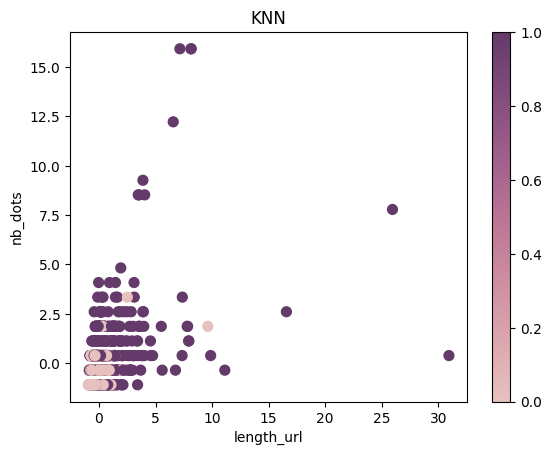

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)

plt.xlabel('length_url')
plt.ylabel('nb_dots')
plt.title('KNN')

plt.show()